In [21]:
from qiskit import QuantumCircuit
from qiskit.circuit.random import random_circuit
from qiskit.circuit.library import XGate, YGate, ZGate, HGate, SGate, TGate
import random

def create_filtered_random_circuit(n_qubits, n_gates):
    """
    Create a random quantum circuit with specified gates and measurements.
    
    Parameters:
    - n_qubits (int): Number of qubits in the circuit.
    - n_gates (int): Number of gates to apply (excluding measurements).
    
    Returns:
    - QuantumCircuit: The generated quantum circuit.
    """
    circuit = QuantumCircuit(n_qubits, n_qubits)  # Create circuit with qubits and classical bits for measurement

    gate_list = [XGate(), YGate(), ZGate(), HGate(), SGate(), TGate()]
    gate_names = ['x', 'y', 'z', 'h', 's', 't']
    
    for _ in range(n_gates):
        gate = random.choice(gate_list)
        gate_name = random.choice(gate_names)
        qubit = random.randint(0, n_qubits - 1)
        
        if gate_name == 'x':
            circuit.x(qubit)
        elif gate_name == 'y':
            circuit.y(qubit)
        elif gate_name == 'z':
            circuit.z(qubit)
        elif gate_name == 'h':
            circuit.h(qubit)
        elif gate_name == 's':
            circuit.s(qubit)
        elif gate_name == 't':
            circuit.t(qubit)
    
    # Add CNOT gates
    for _ in range(n_gates // 2):  # Example: add half the number of gates as CNOT gates
        control = random.randint(0, n_qubits - 1)
        target = random.choice([i for i in range(n_qubits) if i != control])
        circuit.cx(control, target)
    
    # Add measurements to all qubits
    circuit.measure(range(n_qubits), range(n_qubits))
    
    return circuit
    

def classify_gate(gate):
    """Classify the type of gate."""
    if len(gate[1]) == 1:
        # Single-qubit gate
        return 'Single-Qubit Gate'
    elif len(gate[1]) == 2 and gate[0].name == 'cx':
        # CNOT gate
        return 'CNOT Gate'
    else:
        return 'Unknown Gate'

def classify_circuit(circuit):
    """
    Classify each gate in the provided QuantumCircuit.

    Parameters:
    - circuit (QuantumCircuit): The quantum circuit to classify.

    Returns:
    - None: Prints the classification of each gate in the circuit.
    """
    print("\nGate Classification:")
    for gate in circuit.data:
        gate_type = classify_gate(gate)
        gate_name = gate[0].name
        qubits = [bit.index for bit in gate[1]]
        print(f"Gate: {gate_name}, Qubits: {qubits}, Type: {gate_type}")


classify_circuit(create_filtered_random_circuit(n_qubits=3, n_gates=5))


Gate Classification:


/var/folders/6g/7pb_sfy561v161pgxcn9wdch0000gn/T/ipykernel_9635/491525102.py:54: DeprecationWarning: Treating CircuitInstruction as an iterable is deprecated legacy behavior since Qiskit 1.2, and will be removed in Qiskit 2.0. Instead, use the `operation`, `qubits` and `clbits` named attributes.
  if len(gate[1]) == 1:
/var/folders/6g/7pb_sfy561v161pgxcn9wdch0000gn/T/ipykernel_9635/491525102.py:76: DeprecationWarning: Treating CircuitInstruction as an iterable is deprecated legacy behavior since Qiskit 1.2, and will be removed in Qiskit 2.0. Instead, use the `operation`, `qubits` and `clbits` named attributes.
  gate_name = gate[0].name
/var/folders/6g/7pb_sfy561v161pgxcn9wdch0000gn/T/ipykernel_9635/491525102.py:77: DeprecationWarning: Treating CircuitInstruction as an iterable is deprecated legacy behavior since Qiskit 1.2, and will be removed in Qiskit 2.0. Instead, use the `operation`, `qubits` and `clbits` named attributes.
  qubits = [bit.index for bit in gate[1]]


AttributeError: 'Qubit' object has no attribute 'index'

In [23]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import XGate, YGate, ZGate, HGate, SGate, TGate
import random

def create_filtered_random_circuit(n_qubits, n_gates):
    """
    Create a random quantum circuit with specified gates and measurements.
    
    Parameters:
    - n_qubits (int): Number of qubits in the circuit.
    - n_gates (int): Number of gates to apply (excluding measurements).
    
    Returns:
    - QuantumCircuit: The generated quantum circuit.
    """
    circuit = QuantumCircuit(n_qubits, n_qubits)  # Create circuit with qubits and classical bits for measurement

    gate_list = [XGate(), YGate(), ZGate(), HGate(), SGate(), TGate()]
    gate_names = ['x', 'y', 'z', 'h', 's', 't']
    
    for _ in range(n_gates):
        gate = random.choice(gate_list)
        gate_name = random.choice(gate_names)
        qubit = random.randint(0, n_qubits - 1)
        
        if gate_name == 'x':
            circuit.x(qubit)
        elif gate_name == 'y':
            circuit.y(qubit)
        elif gate_name == 'z':
            circuit.z(qubit)
        elif gate_name == 'h':
            circuit.h(qubit)
        elif gate_name == 's':
            circuit.s(qubit)
        elif gate_name == 't':
            circuit.t(qubit)
    
    # Add CNOT gates
    for _ in range(n_gates // 2):  # Example: add half the number of gates as CNOT gates
        control = random.randint(0, n_qubits - 1)
        target = random.choice([i for i in range(n_qubits) if i != control])
        circuit.cx(control, target)
    
    # Add measurements to all qubits
    circuit.measure(range(n_qubits), range(n_qubits))
    
    return circuit

def classify_gate(gate):
    """Classify the type of gate."""
    if len(gate.qubits) == 1:
        # Single-qubit gate
        return 'Single-Qubit Gate'
    elif len(gate.qubits) == 2 and gate.operation.name == 'cx':
        # CNOT gate
        return 'CNOT Gate'
    else:
        return 'Unknown Gate'

def classify_circuit(circuit):
    """
    Classify each gate in the provided QuantumCircuit.

    Parameters:
    - circuit (QuantumCircuit): The quantum circuit to classify.

    Returns:
    - None: Prints the classification of each gate in the circuit.
    """
    print("\nGate Classification:")
    for gate in circuit.data:
        gate_type = classify_gate(gate)
        gate_name = gate.operation.name
        qubits = [circuit.find_bit(q).index for q in gate.qubits]
        print(f"Gate: {gate_name}, Qubits: {qubits}, Type: {gate_type}")

# Create and classify a random circuit
circuit = create_filtered_random_circuit(n_qubits=3, n_gates=5)
classify_circuit(circuit)



Gate Classification:
Gate: t, Qubits: [1], Type: Single-Qubit Gate
Gate: t, Qubits: [2], Type: Single-Qubit Gate
Gate: t, Qubits: [2], Type: Single-Qubit Gate
Gate: h, Qubits: [1], Type: Single-Qubit Gate
Gate: x, Qubits: [0], Type: Single-Qubit Gate
Gate: cx, Qubits: [1, 0], Type: CNOT Gate
Gate: cx, Qubits: [0, 2], Type: CNOT Gate
Gate: measure, Qubits: [0], Type: Single-Qubit Gate
Gate: measure, Qubits: [1], Type: Single-Qubit Gate
Gate: measure, Qubits: [2], Type: Single-Qubit Gate


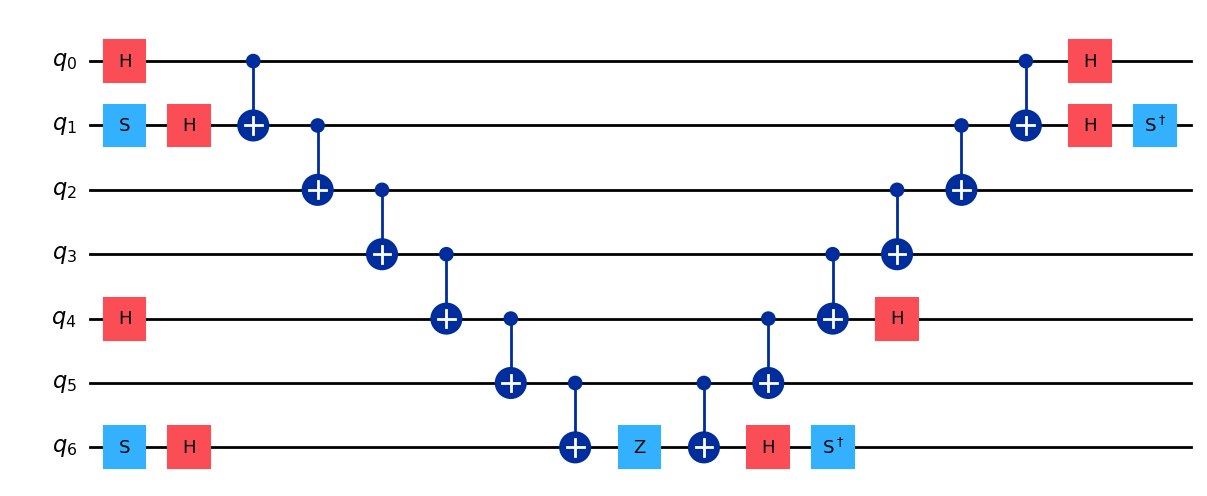

In [32]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import SdgGate

# Create a quantum circuit with 7 qubits
qc = QuantumCircuit(7)

# Initial gate setup:
qc.h(0)            # Hadamard on qubit 0
qc.s(1)            # S gate on qubit 1
qc.h(1)            # Hadamard on qubit 1
qc.h(4)            # Hadamard on qubit 4
qc.s(6)            # S gate on qubit 6
qc.h(6)            # Hadamard on qubit 6

# Descending CNOT tree (from qubit 0 to qubit 6)
for i in range(6):  # Loop through qubits 0 to 5
    qc.cx(i, i + 1)

qc.z(6)

# Ascending CNOT tree (from qubit 6 to qubit 0)
for i in range(5, -1, -1):  # Loop through qubits 6 to 1 in reverse
    qc.cx(i, i+1)

# Inverse of the initial gate setup:
qc.h(0)            # Inverse of H is H on qubit 0
qc.h(1)            # Apply H on qubit 1 (inverse of the second Hadamard)
qc.append(SdgGate(), [1])  # Apply S-dagger on qubit 1 (inverse of S)
qc.h(4)            # Inverse of H is H on qubit 4
qc.h(6)            # Apply H on qubit 6 (inverse of the second Hadamard)
qc.append(SdgGate(), [6])  # Apply S-dagger on qubit 6 (inverse of S)

# Show the quantum circuit
qc.draw('mpl')


In [54]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.circuit.library import SdgGate
from qiskit.visualization import array_to_latex

# Create a quantum circuit with 7 qubits
qc = QuantumCircuit(7)

# Initial gate setup:
qc.h(0)            # Hadamard on qubit 0
qc.s(1)            # S gate on qubit 1
qc.h(1)            # Hadamard on qubit 1
qc.h(2)            # Hadamard on qubit 4
            # Hadamard on qubit 6

# Descending CNOT tree (from qubit 0 to qubit 6)
for i in range(6):  # Loop through qubits 0 to 5
    qc.cx(i, i + 1)

# Ascending CNOT tree (from qubit 6 to qubit 0)
for i in range(5, -1, -1):  # Loop through qubits 6 to 1 in reverse
    qc.cx(i + 1, i)

# Inverse of the initial gate setup:
qc.h(0)            # Inverse of H is H on qubit 0
qc.h(1)            # Apply H on qubit 1 (inverse of the second Hadamard)
qc.append(SdgGate(), [1])  # Apply S-dagger on qubit 1 (inverse of S)
qc.h(2)            # Inverse of H is H on qubit 4

# Use Aer's unitary simulator to get the matrix
simulator = Aer.get_backend('unitary_simulator')

new_circuit = transpile(qc, simulator)
result= simulator.run(new_circuit).result()

# Get the unitary matrix from the result
unitary_matrix = result.get_unitary(qc)

# Print the unitary matrix
print(unitary_matrix)

# Optionally, display it in LaTeX format for visualization (e.g. in Jupyter Notebook)
array_to_latex(unitary_matrix, prefix="\\text{Circuit Unitary} = ")


Operator([[ 5.00000000e-01-2.17894100e-33j,
           -4.16333634e-17+6.53682299e-33j,
           -3.06161700e-17+4.35788200e-33j, ...,
            0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j],
          [ 4.35788200e-33+3.06161700e-17j,
            7.85046229e-17-3.06161700e-17j,
           -3.06161700e-17+5.00000000e-01j, ...,
            0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j],
          [-3.06161700e-17+0.00000000e+00j,
            3.06161700e-17-9.71445147e-17j,
            5.55111512e-17+1.08947050e-32j, ...,
            0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j],
          ...,
          [ 0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j, ...,
            0.00000000e+00+0.00000000e

<IPython.core.display.Latex object>

In [46]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.circuit.library import SdgGate
from qiskit.visualization import array_to_latex

# Create a quantum circuit with 7 qubits
qc2 = QuantumCircuit(7)

# Apply gates as per the description
qc2.h(2)            # Hadamard on qubit 2
qc2.s(2)            # S gate on qubit 2
qc2.h(3)            # Hadamard on qubit 3
qc2.h(4)            # Hadamard on qubit 4
qc2.h(6)            # Hadamard on qubit 6
qc2.s(6)            # S gate on qubit 6

# Use Aer's unitary simulator to get the matrix
simulator = Aer.get_backend('unitary_simulator')
# result2 = execute(qc2, simulator).result()


new_circuit2 = transpile(qc2, simulator)
result2= simulator.run(new_circuit2).result()

# Get the unitary matrix from the result
unitary_matrix2 = result2.get_unitary(qc2)

# Compute the dagger (conjugate transpose) of the unitary matrix
dagger_matrix = np.conjugate(unitary_matrix2).T

# Print the dagger matrix
print(dagger_matrix)

# Optionally, display the dagger matrix in LaTeX format for visualization
array_to_latex(dagger_matrix, prefix="\\text{Dagger of Circuit Unitary} = ")

[[ 0.25-0.000000e+00j  0.  -0.000000e+00j  0.  -0.000000e+00j ...
   0.  -0.000000e+00j  0.  -0.000000e+00j  0.  -0.000000e+00j]
 [ 0.  -0.000000e+00j  0.25-0.000000e+00j  0.  -0.000000e+00j ...
   0.  -0.000000e+00j  0.  -0.000000e+00j  0.  -0.000000e+00j]
 [ 0.  -0.000000e+00j  0.  -0.000000e+00j  0.25-0.000000e+00j ...
   0.  -0.000000e+00j  0.  -0.000000e+00j  0.  -0.000000e+00j]
 ...
 [ 0.  -0.000000e+00j  0.  -0.000000e+00j  0.  -0.000000e+00j ...
  -0.25-3.061617e-17j  0.  -0.000000e+00j  0.  -0.000000e+00j]
 [ 0.  -0.000000e+00j  0.  -0.000000e+00j  0.  -0.000000e+00j ...
   0.  -0.000000e+00j -0.25-3.061617e-17j  0.  -0.000000e+00j]
 [ 0.  -0.000000e+00j  0.  -0.000000e+00j  0.  -0.000000e+00j ...
   0.  -0.000000e+00j  0.  -0.000000e+00j -0.25-3.061617e-17j]]


<IPython.core.display.Latex object>

In [47]:
array_to_latex(unitary_matrix2, prefix="\\text{Unitary of Matrix 2 Circuit Unitary} = ")

<IPython.core.display.Latex object>

In [55]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.circuit.library import SdgGate

# --- First Circuit ---

# Create the first quantum circuit with 7 qubits
qc1 = QuantumCircuit(7)

# Initial gate setup:
qc1.h(0)            # Hadamard on qubit 0
qc1.s(1)            # S gate on qubit 1
qc1.h(1)            # Hadamard on qubit 1
qc1.h(4)            # Hadamard on qubit 4
qc1.s(6)            # S gate on qubit 6
qc1.h(6)            # Hadamard on qubit 6

# Descending CNOT tree (from qubit 0 to qubit 6)
for i in range(6):  
    qc1.cx(i, i + 1)

# Ascending CNOT tree (from qubit 6 to qubit 0)
for i in range(5, -1, -1):  
    qc1.cx(i + 1, i)

# Inverse of the initial gate setup:
qc1.h(0)            
qc1.h(1)            
qc1.append(SdgGate(), [1])  
qc1.h(4)            
qc1.h(6)            
qc1.append(SdgGate(), [6])  

# Use Aer's unitary simulator to get the matrix
simulator = Aer.get_backend('unitary_simulator')

new_circuit1 = transpile(qc1, simulator)
result1= simulator.run(new_circuit1).result()
unitary_matrix1 = result1.get_unitary(qc1)

# --- Second Circuit ---

# Create the second quantum circuit with 7 qubits
qc2 = QuantumCircuit(7)

# Apply gates as per the description
qc2.h(2)            # Hadamard on qubit 2
qc2.s(2)            # S gate on qubit 2
qc2.h(3)            # Hadamard on qubit 3
qc2.h(4)            # Hadamard on qubit 4
qc2.h(6)            # Hadamard on qubit 6
qc2.s(6)            # S gate on qubit 6

# Use Aer's unitary simulator to get the matrix
new_circuit2 = transpile(qc2, simulator)

result2= simulator.run(new_circuit2).result()

unitary_matrix2 = result2.get_unitary(qc2)

# Compute the dagger (Hermitian conjugate) of the second matrix
dagger_matrix2 = np.conjugate(unitary_matrix2).T

# --- Matrix Multiplication ---

# Multiply the first matrix by the dagger of the second matrix
# product_matrix = np.dot(np.dot(dagger_matrix2, unitary_matrix1), unitary_matrix2)
prduct_matrix = np.dot( np.dot(dagger_matrix2, unitary_matrix1)

# Print the resulting product matrix
print("Product of the matrices:")
print(product_matrix)


from qiskit.visualization import array_to_latex
array_to_latex(product_matrix, prefix="\\text{Product of Matrices} = ")


Product of the matrices:
[[-5.68254808e-18-1.29524423e-17j -6.08829210e-34-1.65822723e-33j
  -2.46515927e-34-7.93737426e-34j ... -1.90376875e-17-1.96261557e-17j
   1.96261557e-17-1.90376875e-17j  2.60522619e-17-2.50000000e-01j]
 [ 2.22225787e-33+2.73797966e-33j  1.04614889e-18+1.34888037e-17j
  -1.04083409e-17-1.73472348e-18j ...  6.93889390e-18-2.50000000e-01j
   2.50000000e-01+3.83427036e-17j -1.90376875e-17+1.96261557e-17j]
 [-9.33078218e-18-5.77194166e-18j -1.56193074e-33+1.76531750e-33j
   2.19145399e-33-1.48682102e-33j ...  2.02146239e-17-1.96261557e-17j
  -1.96261557e-17-1.04015461e-17j  4.61803690e-17-2.50000000e-01j]
 ...
 [-2.30350463e-33-7.51541627e-34j -4.36990872e-17-9.66178248e-18j
  -3.38536818e-17+4.58445330e-17j ...  5.09327358e-17-1.38777878e-17j
   0.00000000e+00-1.13022766e-17j  3.85185989e-33+4.90653893e-18j]
 [-3.31723380e-18+5.22881468e-17j  5.09873222e-33-4.05335006e-33j
   1.36561129e-33+3.31557171e-33j ...  3.08148791e-33-4.90653893e-18j
   4.90653893e-18-3.08

<IPython.core.display.Latex object>

In [53]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.quantum_info import Operator
from qiskit.circuit.library import UnitaryGate

# --- First Circuit ---

# Create the first quantum circuit with 7 qubits
qc1 = QuantumCircuit(7)

# Initial gate setup:
qc1.h(0)            # Hadamard on qubit 0
qc1.s(1)            # S gate on qubit 1
qc1.h(1)            # Hadamard on qubit 1
qc1.h(4)            # Hadamard on qubit 4
qc1.s(6)            # S gate on qubit 6
qc1.h(6)            # Hadamard on qubit 6

# Descending CNOT tree (from qubit 0 to qubit 6)
for i in range(6):  
    qc1.cx(i, i + 1)

# Ascending CNOT tree (from qubit 6 to qubit 0)
for i in range(5, -1, -1):  
    qc1.cx(i + 1, i)

# Inverse of the initial gate setup:
qc1.h(0)            
qc1.h(1)            
qc1.sdg(1)          # Inverse of S on qubit 1 (S-dagger)
qc1.h(4)            
qc1.h(6)            
qc1.sdg(6)          # Inverse of S on qubit 6 (S-dagger)

# Use Aer's unitary simulator to get the matrix
simulator = Aer.get_backend('unitary_simulator')

new_circuit1 = transpile(qc1, simulator)

result1= simulator.run(new_circuit1).result()


unitary_matrix1 = result1.get_unitary(qc1)

# --- Second Circuit ---

# Create the second quantum circuit with 7 qubits
qc2 = QuantumCircuit(7)

# Apply gates as per the description
qc2.h(2)            # Hadamard on qubit 2
qc2.s(2)            # S gate on qubit 2
qc2.h(3)            # Hadamard on qubit 3
qc2.h(4)            # Hadamard on qubit 4
qc2.h(6)            # Hadamard on qubit 6
qc2.s(6)            # S gate on qubit 6

# Use Aer's unitary simulator to get the matrix
new_circuit2 = transpile(qc2, simulator)

result2= simulator.run(new_circuit2).result()
unitary_matrix2 = result2.get_unitary(qc2)

# Compute the dagger (Hermitian conjugate) of the second matrix
dagger_matrix2 = np.conjugate(unitary_matrix2).T

# --- Matrix Multiplication ---

# Multiply the first matrix by the dagger of the second matrix
product_matrix = np.dot(np.dot(dagger_matrix2, unitary_matrix1), unitary_matrix2)

# Print the resulting product matrix
print("Product of the matrices:")
print(product_matrix)

# --- Convert the Product Matrix to Quantum Circuit ---

# Create a 7-qubit quantum circuit to embed the product matrix
qc_product = QuantumCircuit(7)

# Embed the product matrix as a unitary gate in the new quantum circuit
unitary_gate = UnitaryGate(product_matrix)
qc_product.append(unitary_gate, range(7))

# Print the quantum circuit
print(qc_product)


Product of the matrices:
[[-5.68254808e-18-1.29524423e-17j -6.08829210e-34-1.65822723e-33j
  -2.46515927e-34-7.93737426e-34j ... -1.90376875e-17-1.96261557e-17j
   1.96261557e-17-1.90376875e-17j  2.60522619e-17-2.50000000e-01j]
 [ 2.22225787e-33+2.73797966e-33j  1.04614889e-18+1.34888037e-17j
  -1.04083409e-17-1.73472348e-18j ...  6.93889390e-18-2.50000000e-01j
   2.50000000e-01+3.83427036e-17j -1.90376875e-17+1.96261557e-17j]
 [-9.33078218e-18-5.77194166e-18j -1.56193074e-33+1.76531750e-33j
   2.19145399e-33-1.48682102e-33j ...  2.02146239e-17-1.96261557e-17j
  -1.96261557e-17-1.04015461e-17j  4.61803690e-17-2.50000000e-01j]
 ...
 [-2.30350463e-33-7.51541627e-34j -4.36990872e-17-9.66178248e-18j
  -3.38536818e-17+4.58445330e-17j ...  5.09327358e-17-1.38777878e-17j
   0.00000000e+00-1.13022766e-17j  3.85185989e-33+4.90653893e-18j]
 [-3.31723380e-18+5.22881468e-17j  5.09873222e-33-4.05335006e-33j
   1.36561129e-33+3.31557171e-33j ...  3.08148791e-33-4.90653893e-18j
   4.90653893e-18-3.08